<a href="https://colab.research.google.com/github/BlackCurrantDS/ATiML-Project/blob/master/PCA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Runs PCA analysis on scaled features and chooses the number of compoenets to be used by PCA

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_data = pd.read_csv("features_scaled_train.csv", index_col=0)

In [ ]:
train_data.head(1)

,ID,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q,positive_x,negative_x,neutral,compund,positive_y,negative_y,anger,disgust,fear,sadness,anticipation,joy,surprise,trust,genre
0,214.0,0.277991,0.299471,0.278088,0.277991,0.299471,0.278088,0.535962,0.038124,0.009887,0.527253,0.48169,0.653485,0.0,0.37607,0.598408,0.250728,0.30137,0.107704,0.390218,0.641153,0.699711,0.459219,0.278968,0.453705,0.011573,0.0,0.009859,0.073315,0.349139,1.0,1.0,0.944704,1.0,0.759819,0.580613,0.663251,0.653755,0.47033,Allegories


In [ ]:
val_data = pd.read_csv("features_scaled_validation.csv", index_col=0)

In [ ]:
val_data.head(1)

,ID,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q,positive_x,negative_x,neutral,compund,positive_y,negative_y,anger,disgust,fear,sadness,anticipation,joy,surprise,trust,genre
0,199.0,0.089663,0.101551,0.088849,0.089663,0.101551,0.088849,0.743533,0.0,0.180751,0.406176,0.501059,0.483654,0.0,0.24883,0.414924,0.060357,0.068149,0.302392,0.392023,0.488035,0.241019,0.425689,0.202635,0.243198,0.14859,0.0,0.135663,0.430925,0.700794,0.083454,0.17489,0.296394,0.113323,0.621033,0.81326,0.678935,0.134974,0.725664,Allegories


In [ ]:
first_cols = ['ID','genre'] #,'Author_Name', 'Book_Name'
last_cols = [col for col in train_data.columns if col not in first_cols]

train_data = train_data[first_cols+last_cols]

In [ ]:
train_data.head(1)

,ID,genre,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q,positive_x,negative_x,neutral,compund,positive_y,negative_y,anger,disgust,fear,sadness,anticipation,joy,surprise,trust
0,214.0,Allegories,0.277991,0.299471,0.278088,0.277991,0.299471,0.278088,0.535962,0.038124,0.009887,0.527253,0.48169,0.653485,0.0,0.37607,0.598408,0.250728,0.30137,0.107704,0.390218,0.641153,0.699711,0.459219,0.278968,0.453705,0.011573,0.0,0.009859,0.073315,0.349139,1.0,1.0,0.944704,1.0,0.759819,0.580613,0.663251,0.653755,0.47033


In [ ]:
train_data.shape

(155, 40)

In [ ]:
first_cols = ['ID','genre'] #,'Author_Name', 'Book_Name'
last_cols = [col for col in val_data.columns if col not in first_cols]

val_data = val_data[first_cols+last_cols]

In [ ]:
X_train,y_train = train_data.values[:,2:], train_data.values[:,1]

In [ ]:
print("Shape of training input", X_train.shape)
print("Shape of training output", y_train.shape)

Shape of training input (155, 38)
Shape of training output (155,)


In [ ]:
X_val,y_val = val_data.values[:,2:], val_data.values[:,1]

In [ ]:
print("Shape of test input", X_val.shape)
print("Shape of test output", y_val.shape)

Shape of test input (80, 38)
Shape of test output (80,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#model selection
for i in (5,10,15,20,25,30,35):
    sc= []
    pca = PCA(n_components=i)
    print("for components =",i,"error is", (1-cross_val_score(pca, X_train, y_train, cv=10)).mean())
    sc.append((1-cross_val_score(pca, X_train, y_train, cv=5)).mean())
print("Average error of 5-fold CV is :" ,sc)


for components = 5 error is -21.538576996688764
for components = 10 error is -23.428411732721447
for components = 15 error is -24.572754996802274
for components = 20 error is -19.604283810273966
for components = 25 error is 1.7552677236951837
for components = 30 error is 235.25495132036366
for components = 35 error is inf
Average error of 5-fold CV is : [inf]


In [ ]:
pca = PCA(n_components=20)
X_train_pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)


**Logistic regression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_pca,y_train)
y_pred_lr = lr.predict(X_val_pca)

In [ ]:
print("Accuracy on overall test set is:", metrics.accuracy_score(y_val,y_pred_lr))

Accuracy on overall test set is: 0.5375


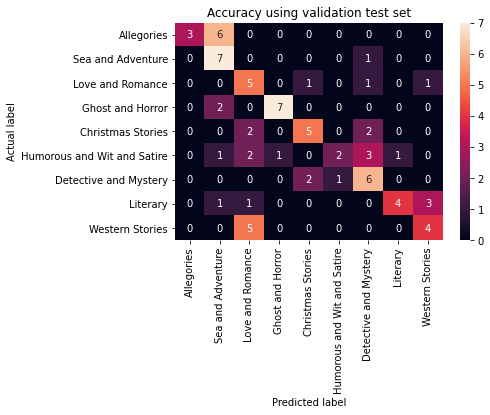

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_val, y_pred_lr)
sns.heatmap(cm, annot=True , xticklabels=train_data.genre.unique(), yticklabels=train_data.genre.unique())
plt.title('Accuracy using validation test set'.format(accuracy_score(y_val, y_pred_lr)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print(classification_report(y_val, y_pred_lr))

                             precision    recall  f1-score   support

                 Allegories       1.00      0.33      0.50         9
          Christmas Stories       0.41      0.88      0.56         8
      Detective and Mystery       0.33      0.62      0.43         8
           Ghost and Horror       0.88      0.78      0.82         9
Humorous and Wit and Satire       0.62      0.56      0.59         9
                   Literary       0.67      0.20      0.31        10
           Love and Romance       0.46      0.67      0.55         9
          Sea and Adventure       0.80      0.44      0.57         9
            Western Stories       0.50      0.44      0.47         9

                   accuracy                           0.54        80
                  macro avg       0.63      0.55      0.53        80
               weighted avg       0.64      0.54      0.53        80



**Logistic regression with weights**

In [ ]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train_pca,y_train)
y_pred_lr = lr.predict(X_val_pca)

In [ ]:
print("Accuracy on overall test set is:", metrics.accuracy_score(y_val,y_pred_lr))

Accuracy on overall test set is: 0.55


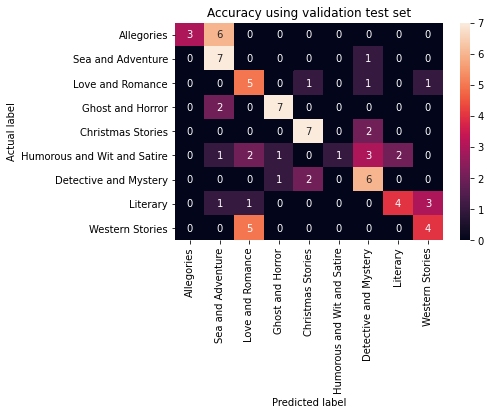

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_val, y_pred_lr)
sns.heatmap(cm, annot=True , xticklabels=train_data.genre.unique(), yticklabels=train_data.genre.unique())
plt.title('Accuracy using validation test set'.format(accuracy_score(y_val, y_pred_lr)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print(classification_report(y_val, y_pred_lr))

                             precision    recall  f1-score   support

                 Allegories       1.00      0.33      0.50         9
          Christmas Stories       0.41      0.88      0.56         8
      Detective and Mystery       0.38      0.62      0.48         8
           Ghost and Horror       0.78      0.78      0.78         9
Humorous and Wit and Satire       0.70      0.78      0.74         9
                   Literary       1.00      0.10      0.18        10
           Love and Romance       0.46      0.67      0.55         9
          Sea and Adventure       0.67      0.44      0.53         9
            Western Stories       0.50      0.44      0.47         9

                   accuracy                           0.55        80
                  macro avg       0.66      0.56      0.53        80
               weighted avg       0.67      0.55      0.53        80



**SVM**

In [ ]:
from sklearn.svm import SVC
lr = SVC()
lr.fit(X_train_pca,y_train)
y_pred_lr = lr.predict(X_val_pca)

In [ ]:
print("Accuracy on overall test set is:", metrics.accuracy_score(y_val,y_pred_lr))

Accuracy on overall test set is: 0.7


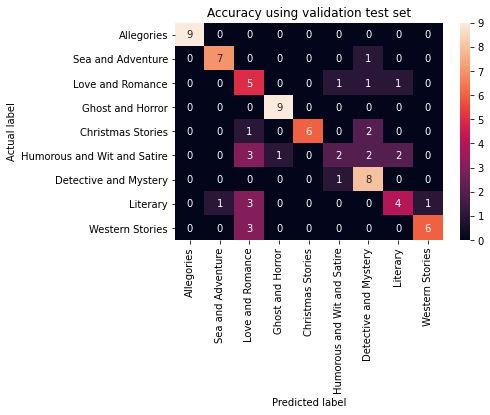

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_val, y_pred_lr)
sns.heatmap(cm, annot=True , xticklabels=train_data.genre.unique(), yticklabels=train_data.genre.unique())
plt.title('Accuracy using validation test set'.format(accuracy_score(y_val, y_pred_lr)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print(classification_report(y_val, y_pred_lr))

                             precision    recall  f1-score   support

                 Allegories       1.00      1.00      1.00         9
          Christmas Stories       0.88      0.88      0.88         8
      Detective and Mystery       0.33      0.62      0.43         8
           Ghost and Horror       0.90      1.00      0.95         9
Humorous and Wit and Satire       1.00      0.67      0.80         9
                   Literary       0.50      0.20      0.29        10
           Love and Romance       0.57      0.89      0.70         9
          Sea and Adventure       0.57      0.44      0.50         9
            Western Stories       0.86      0.67      0.75         9

                   accuracy                           0.70        80
                  macro avg       0.73      0.71      0.70        80
               weighted avg       0.73      0.70      0.69        80



**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
lr = MultinomialNB()
lr.fit(X_train_pca,y_train)
y_pred_lr = lr.predict(X_val_pca)

In [ ]:
print("Accuracy on overall test set is:", metrics.accuracy_score(y_val,y_pred_lr))

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_val, y_pred_lr)
cm_df = pd.DataFrame(cm,
                     index = ['literary','detective','sea'], 
                     columns = ['literary','detective','sea'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using validation test set'.format(accuracy_score(y_val, y_pred_lr)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print(classification_report(y_val, y_pred_lr))